# Proyecto: Análisis y Predicción de Riesgo Crediticio en Alemania




# **Análisis y Predicción del Riesgo Crediticio en Alemania**

## **Resumen**
El riesgo crediticio es un factor crucial en el sector financiero, pues influye directamente en las decisiones de otorgamiento de crédito y la estabilidad de las instituciones financieras. Este proyecto se centra en el análisis y predicción del riesgo crediticio mediante el uso de técnicas avanzadas de análisis de datos, ingeniería de características y modelos de aprendizaje supervisado. Además, se abordan enfoques de optimización, diseño de experimentos A/B Testing, y evaluación de métricas de rendimiento. Finalmente, se exploran métodos modernos de automatización para facilitar la toma de decisiones estratégicas.



---

## **Referencias**
1. https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk.
2. Herramientas técnicas empleadas (OPENai).

---



# Analisis Exploratorio de datos

Saber a cuantos y a cuales rechazar
tasa de aceptacion +
riesgo -

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Limpieza de datos

In [ ]:
import pandas as pd

# Leer el archivo
df = pd.read_csv('data.csv')

# 1. Eliminar la columna innecesaria
df.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Manejar valores nulos en 'Saving accounts' y 'Checking account'
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

# Convertir la columna Risk a valores numéricos
df['Risk'] = df['Risk'].map({'good': 0, 'bad': 1})

# 3. Crear dummies para las variables categóricas
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Risk                         1000 non-null   int64
 5   Sex_male                     1000 non-null   bool 
 6   Housing_own                  1000 non-null   bool 
 7   Housing_rent                 1000 non-null   bool 
 8   Saving accounts_moderate     1000 non-null   bool 
 9   Saving accounts_quite rich   1000 non-null   bool 
 10  Saving accounts_rich         1000 non-null   bool 
 11  Saving accounts_unknown      1000 non-null   bool 
 12  Checking account_moderate    1000 non-null   bool 
 13  Checking account_rich        1000 non-null   bool

<ipython-input-68-953b7220d96b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-68-953b7220d96b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## **Analisis de variables numericas en torno al riesgo de impago**

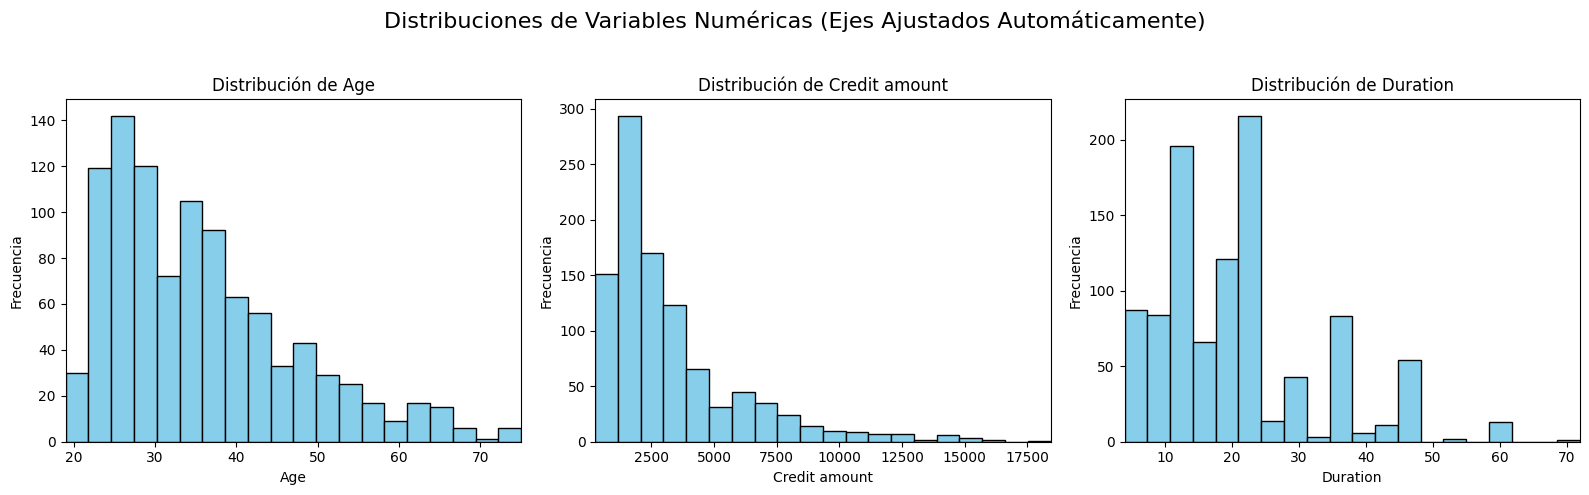

In [ ]:
import matplotlib.pyplot as plt

# Visualizar distribuciones con ejes ajustados automáticamente
numerical_cols = ['Age', 'Credit amount', 'Duration']

# Crear los histogramas
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(16, 5))

for ax, col in zip(axes, numerical_cols):
    # Histograma
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

    # Ajustar los límites del eje X automáticamente
    ax.set_xlim(df[col].min(), df[col].max())

plt.suptitle('Distribuciones de Variables Numéricas (Ejes Ajustados Automáticamente)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para no sobreponer el título
plt.show()


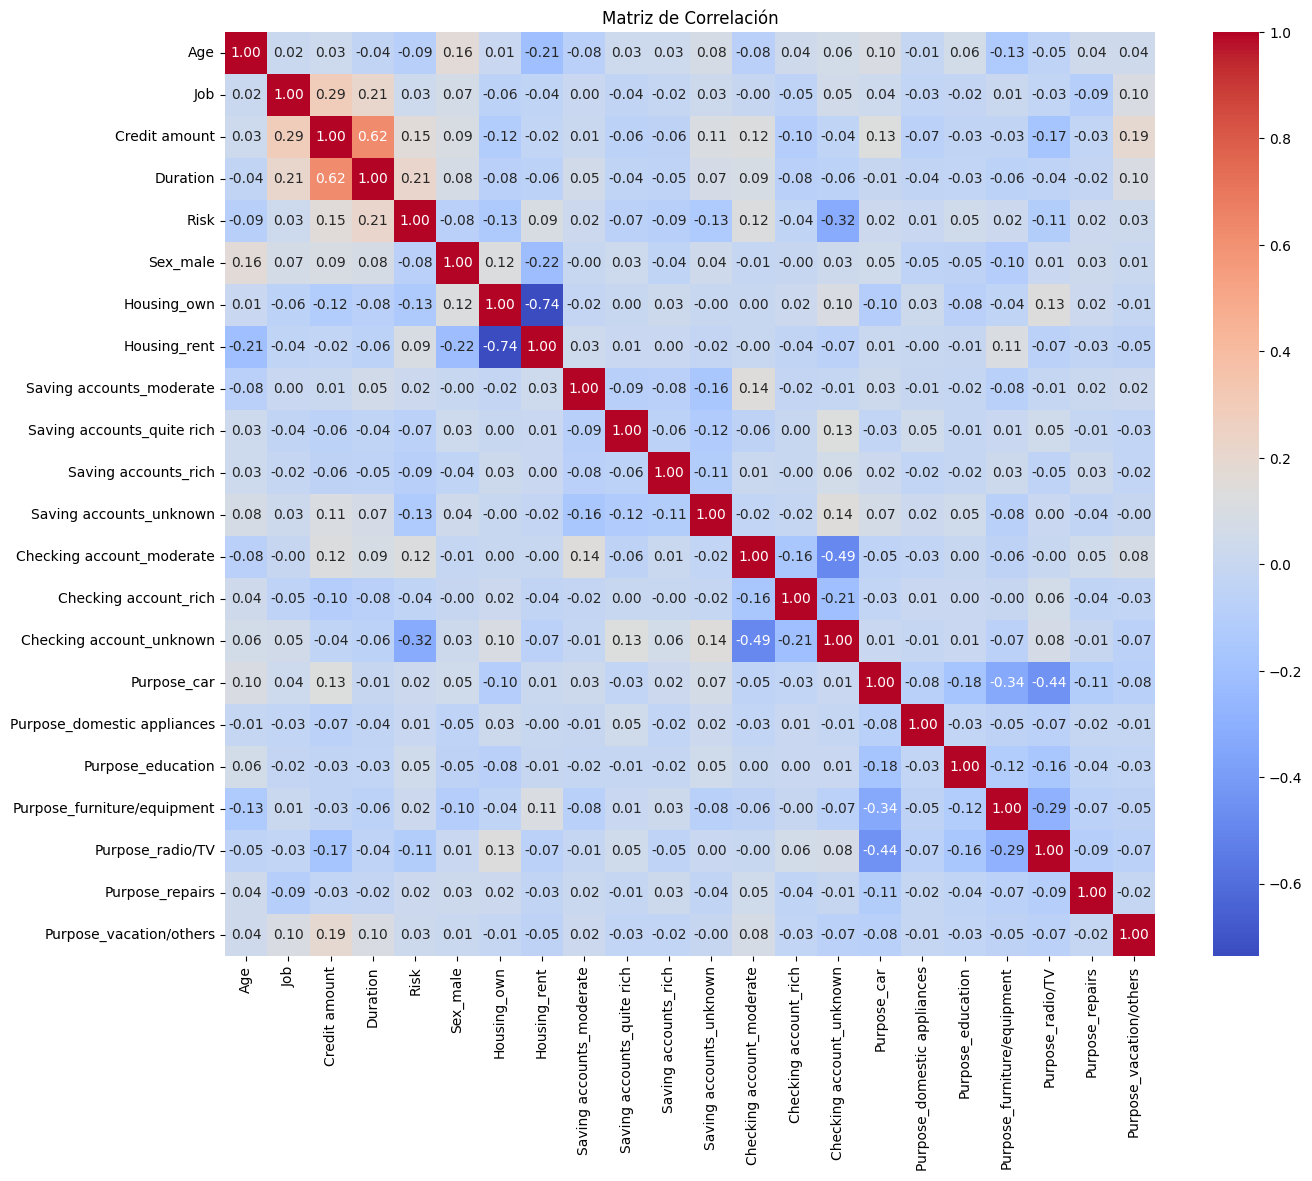

In [ ]:
import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()


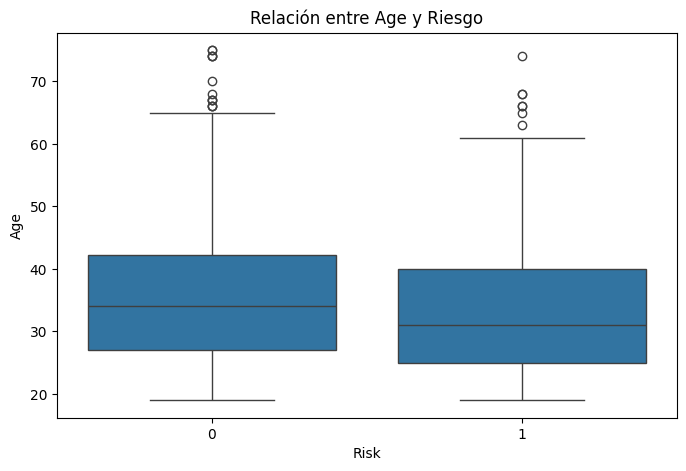

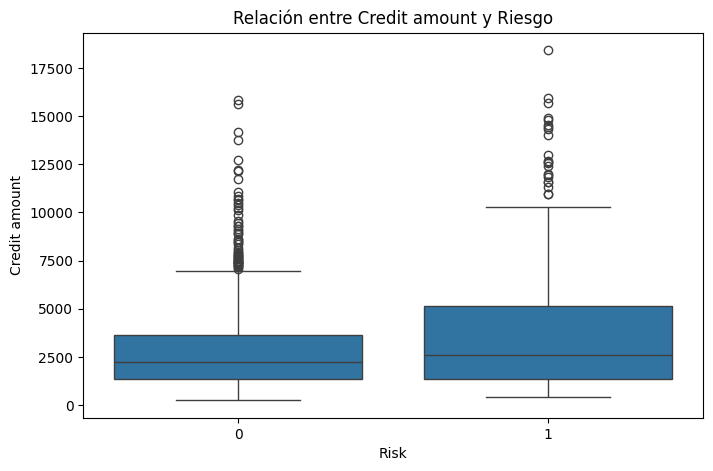

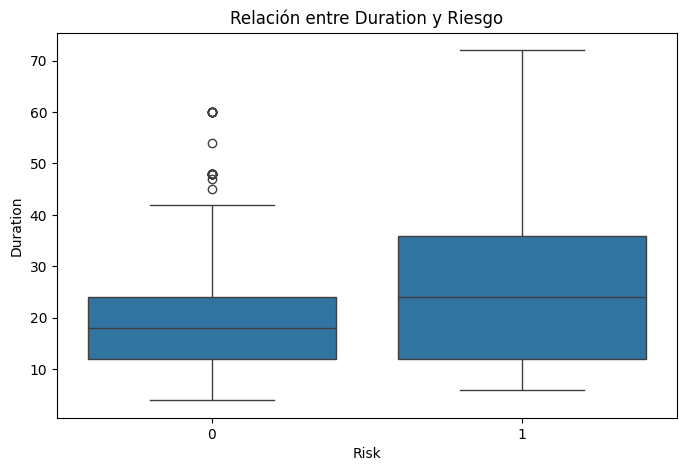

In [ ]:

# Boxplots de relación entre variables numéricas y riesgo
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Risk', y=col, data=df)
    plt.title(f'Relación entre {col} y Riesgo')
    plt.show()


In [ ]:
# Verificar que no haya valores nulos
print(df.isnull().sum())

# Confirmar que todas las columnas son numéricas (incluyendo Risk)
print(df.info())



Age                            0
Job                            0
Credit amount                  0
Duration                       0
Risk                           0
Sex_male                       0
Housing_own                    0
Housing_rent                   0
Saving accounts_moderate       0
Saving accounts_quite rich     0
Saving accounts_rich           0
Saving accounts_unknown        0
Checking account_moderate      0
Checking account_rich          0
Checking account_unknown       0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Definir las variables independientes (X) y la variable dependiente (y)
X = df.drop(columns=['Risk'])  # Todas las columnas excepto Risk
y = df['Risk']

# Ajustar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

# Obtener los coeficientes (betas)
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Beta': logreg.coef_[0]
}).sort_values(by='Beta', ascending=False)

# Mostrar las variables más relacionadas con Risk
print(coefficients)


                       Variable      Beta
16            Purpose_education  0.415644
19              Purpose_repairs  0.301572
15  Purpose_domestic appliances  0.080389
6                  Housing_rent  0.077850
1                           Job  0.036457
3                      Duration  0.035800
14                  Purpose_car  0.018994
2                 Credit amount  0.000025
0                           Age -0.013620
7      Saving accounts_moderate -0.126821
17  Purpose_furniture/equipment -0.168916
20      Purpose_vacation/others -0.248930
5                   Housing_own -0.251592
8    Saving accounts_quite rich -0.341609
11    Checking account_moderate -0.352554
4                      Sex_male -0.366055
18             Purpose_radio/TV -0.377411
10      Saving accounts_unknown -0.780045
12        Checking account_rich -0.820353
9          Saving accounts_rich -0.897874
13     Checking account_unknown -1.731058


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


data lickage
ruido


boxplot antes de hacer modelo para evitar incoherencias


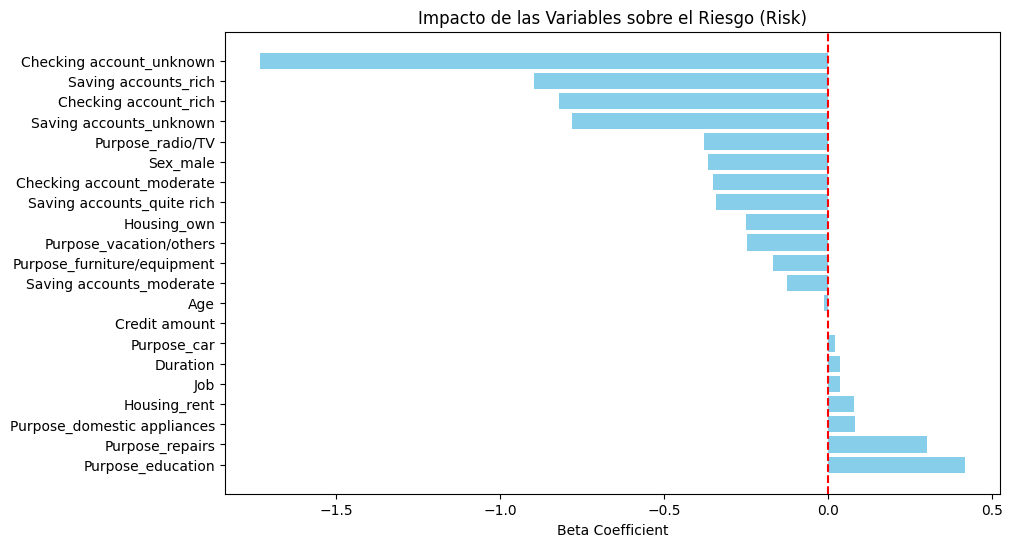

In [ ]:
import matplotlib.pyplot as plt

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Variable'], coefficients['Beta'], color='skyblue')
plt.xlabel('Beta Coefficient')
plt.title('Impacto de las Variables sobre el Riesgo (Risk)')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()


## Insigths del analisis exploratorio de datos:


# **Ingenieria de caracteristicas**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Risk                         1000 non-null   int64
 5   Sex_male                     1000 non-null   bool 
 6   Housing_own                  1000 non-null   bool 
 7   Housing_rent                 1000 non-null   bool 
 8   Saving accounts_moderate     1000 non-null   bool 
 9   Saving accounts_quite rich   1000 non-null   bool 
 10  Saving accounts_rich         1000 non-null   bool 
 11  Saving accounts_unknown      1000 non-null   bool 
 12  Checking account_moderate    1000 non-null   bool 
 13  Checking account_rich        1000 non-null   bool

## Estandarizacion de variables numericas

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']

# Escalar los valores numéricos
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Variables numéricas escaladas:")
print(df[numerical_cols].head())


Variables numéricas escaladas:
        Age       Job  Credit amount  Duration
0  2.766456  0.146949      -0.745131 -1.236478
1 -1.191404  0.146949       0.949817  2.248194
2  1.183312 -1.383771      -0.416562 -0.738668
3  0.831502  0.146949       1.634247  1.750384
4  1.535122  0.146949       0.566664  0.256953


In [ ]:
# Crear nuevas características numéricas
df['Credit_per_month_amount'] = df['Credit amount'] / (df['Duration'])
df['Age_per_credit_ratio'] = df['Age'] / (df['Credit amount'])
df['Rich_car_buyers_ratio'] = ((df['Saving accounts_rich'] == True) & (df['Purpose_car'] == True)).astype(int)
df['No_checking_high_saving'] = ((df['Checking account_unknown'] == True) & (df['Saving accounts_rich'] == True)).astype(int)

print("Nuevas características creadas:")
df[['Credit_per_month_amount', 'Age_per_credit_ratio','Rich_car_buyers_ratio','No_checking_high_saving']].head()


Nuevas características creadas:


,Credit_per_month_amount,Age_per_credit_ratio,Rich_car_buyers_ratio,No_checking_high_saving
0,0.602624,-3.712710,0,0
1,0.422480,-1.254351,0,0
2,0.563938,-2.840660,0,0
3,0.933651,0.508799,0,0
4,2.205319,2.709054,0,0


### Relación Crédito-Duración: Credit_per_month
- Definición:
Calcula el monto mensual aproximado del crédito, al dividir el monto total del crédito (Credit amount) por su duración (Duration).



- Justificación:
Es una métrica clave en el análisis financiero.
Los clientes con una alta carga mensual (Credit_per_month) suelen tener mayor riesgo, ya que esto podría indicar una alta presión financiera.
Captura una relación combinada entre el tamaño del crédito y el plazo de pago, lo que aporta más información que ambas variables por separado.

### Relación Edad-Crédito: Age_per_credit
- Definición:
Relación entre la edad del solicitante (Age) y el monto del crédito solicitado (Credit amount).


- Justificación:
Una proporción baja podría sugerir que un cliente joven está solicitando un crédito desproporcionadamente alto, lo cual podría aumentar el riesgo.
Proporciona un indicador indirecto de experiencia financiera o de capacidad de pago, en función de la edad.

### Interacción entre Dummies: Rich_car_buyers
- Definición:
Crea una interacción lógica entre:
Clientes con cuentas de ahorro "ricas" (Saving accounts_rich).
Que solicitan un crédito para un automóvil (Purpose_car).
- Justificación:
Identificar patrones específicos en subgrupos de clientes puede ser útil para personalizar estrategias de evaluación de riesgo.
Los clientes con cuentas ricas que solicitan créditos para automóviles podrían tener un comportamiento financiero diferente:
Podrían ser menos riesgosos porque tienen ahorros sólidos.
O podrían ser más riesgosos si el crédito solicitado es excesivo, considerando que ya tienen recursos.

### Combinaciones Categóricas Lógicas: No_checking_high_saving

Justificación:
Clientes sin cuenta corriente (Checking account_unknown) pero con ahorros altos (Saving accounts_rich) podrían ser casos excepcionales que merezcan atención.
Este tipo de combinaciones puede resaltar patrones que no son obvios con variables individuales.


In [ ]:
!pip install semopy

In [ ]:
from sklearn.linear_model import LogisticRegression
from semopy import Model
from semopy.inspector import inspect
from semopy import semplot
import pandas as pd
import matplotlib.pyplot as plt

# Separar las variables independientes y dependiente
X = df.drop(columns=['Risk'])
y = df['Risk']

# Ajustar un modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

# Obtener los coeficientes (betas)
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Beta': logreg.coef_[0]
}).sort_values(by='Beta', ascending=False)

# Filtrar variables con betas negativas
negative_betas = coefficients[coefficients['Beta'] < 0]

# Renombrar las columnas problemáticas del DataFrame
rename_columns = {
    "Saving accounts_moderate": "Saving_accounts_moderate",
    "Saving accounts_quite rich": "Saving_accounts_quite_rich",
    "Saving accounts_rich": "Saving_accounts_rich",
    "Saving accounts_unknown": "Saving_accounts_unknown",
    "Checking account_moderate": "Checking_account_moderate",
    "Checking account_rich": "Checking_account_rich",
    "Checking account_unknown": "Checking_account_unknown",
    "Purpose_furniture/equipment": "Purpose_furniture_equipment",
    "Purpose_vacation/others": "Purpose_vacation_others",
    "Purpose_radio/TV": "Purpose_radio_TV",
    "Rich_car_buyers_ratio": "Rich_car_buyers_ratio",
}

# Renombrar las columnas del DataFrame
df = df.rename(columns=rename_columns)

# Actualizar las betas con los nombres de variables corregidos
negative_betas.loc[:, 'Variable'] = negative_betas['Variable'].replace(rename_columns)

# Crear la cadena del modelo SEM con nombres corregidos y valores absolutos de betas
sem_model = "Probabilidad_de_Impago =~ " + " + ".join(
    [f"{abs(row['Beta'])}*{row['Variable']}" for _, row in negative_betas.iterrows()]
)

# Crear el modelo SEM
model = Model(sem_model)

# Ajustar el modelo SEM
df_numeric = df[negative_betas['Variable'].tolist()]  # Usar solo las variables necesarias
df_numeric = df_numeric.fillna(0)  # Rellenar valores faltantes

# Convertir todas las columnas a float para asegurar compatibilidad
df_numeric = df_numeric.astype(float)

# Ajustar el modelo
model.fit(df_numeric)

# Inspeccionar resultados del SEM
results = inspect(model)
print("Resultados del SEM:")
print(results)

# Visualizar el modelo SEM con semplot
semplot(model, filename='sem_path_diagram.png', show=True)

# Calcular la probabilidad de impago usando el modelo ajustado
# Usar las betas originales (negativas) para mantener consistencia
betas_negativas_dict = dict(zip(negative_betas['Variable'], negative_betas['Beta']))

# Calcular probabilidad de impago manualmente
df['Probabilidad_de_Impago'] = df_numeric.apply(
    lambda row: sum(row[var] * beta for var, beta in betas_negativas_dict.items()),
    axis=1
)

# Escalar las probabilidades entre 0 y 1
df['Probabilidad_de_Impago'] = (df['Probabilidad_de_Impago'] - df['Probabilidad_de_Impago'].min()) / (
    df['Probabilidad_de_Impago'].max() - df['Probabilidad_de_Impago'].min()
)

print("Probabilidad de impago añadida al DataFrame.")


Resultados del SEM:
                           lval  op                         rval  Estimate  \
0      Saving_accounts_moderate   ~       Probabilidad_de_Impago  0.125199   
1                           Age   ~       Probabilidad_de_Impago  0.146327   
2                   Housing_own   ~       Probabilidad_de_Impago  0.210122   
3   Purpose_furniture_equipment   ~       Probabilidad_de_Impago  0.216596   
4       Purpose_vacation_others   ~       Probabilidad_de_Impago  0.324981   
5    Saving_accounts_quite_rich   ~       Probabilidad_de_Impago  0.352381   
6     Checking_account_moderate   ~       Probabilidad_de_Impago  0.361440   
7                      Sex_male   ~       Probabilidad_de_Impago  0.380332   
8              Purpose_radio_TV   ~       Probabilidad_de_Impago  0.408931   
9          Saving_accounts_rich   ~       Probabilidad_de_Impago  0.687441   
10        Checking_account_rich   ~       Probabilidad_de_Impago  0.823774   
11      Saving_accounts_unknown   ~       Pr

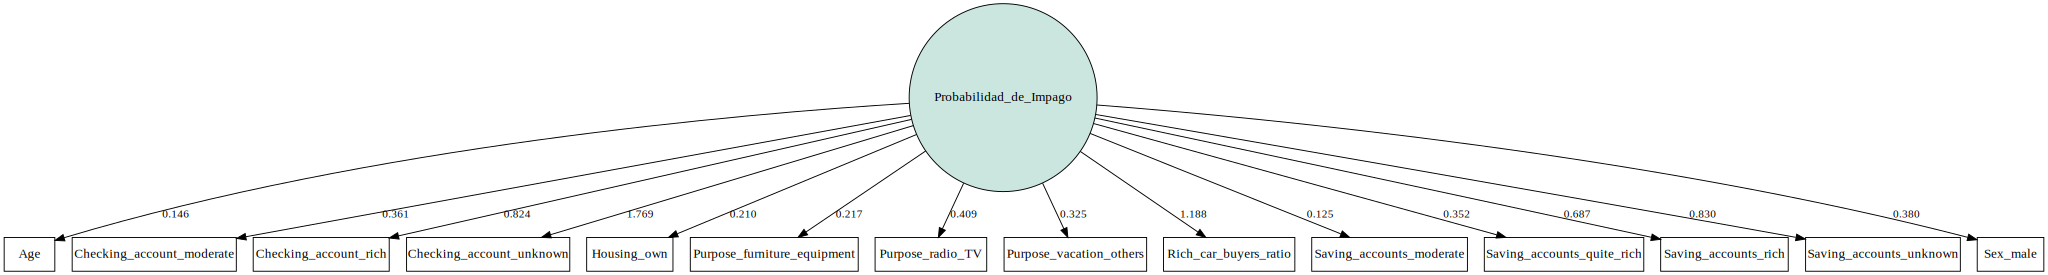

In [ ]:
semplot(model, filename='sem_path_diagram.png', show=True)

riesgo de credito

In [ ]:
# Seleccionar variables con beta significativa
significant_features = coefficients[coefficients['Beta'].abs() > 0.5]

print("Características más relevantes según las betas:")
print(significant_features)


Características más relevantes según las betas:
                    Variable      Beta
9       Saving_accounts_rich -0.687441
12     Checking_account_rich -0.823774
10   Saving_accounts_unknown -0.830385
23     Rich_car_buyers_ratio -1.187858
13  Checking_account_unknown -1.768971


### Clusterizacion

ajustar clusters


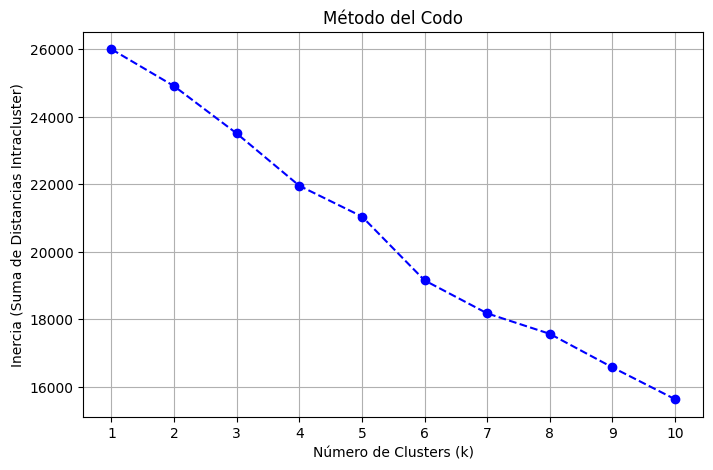

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Excluir columnas no relevantes
X = df.drop(columns=['Risk', 'Cluster'], errors='ignore')  # Excluir Risk y Cluster si existen

# Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del Codo para determinar el número óptimo de clusters
inertia = []  # Lista para guardar las inercias
k_values = range(1, 11)  # Probar valores de k entre 1 y 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de Distancias Intracluster)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Seleccionar el número óptimo de clusters (ajustar según el método del codo)
k_optimal = 8  # Cambiar a partir del gráfico

# Aplicar KMeans con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)



In [ ]:
# Resumen estadístico por cluster
cluster_summary = df.groupby('Cluster').mean()

print("Resumen estadístico por cluster:")
print(cluster_summary)


Resumen estadístico por cluster:
              Age       Job  Credit amount  Duration      Risk  Sex_male  \
Cluster                                                                    
0        0.384411  0.912309       1.750268  0.948356  0.416667  0.750000   
1        0.210571  0.076881      -0.010226 -0.007436  0.105634  0.757042   
2       -0.138052  0.074632      -0.014389 -0.047482  0.307087  0.708661   
3       -0.105478 -0.199194      -0.251326 -0.001124  0.356784  0.693467   
4        0.536234 -0.181062      -0.345724 -0.264562  0.142857  0.714286   
5        0.287887  0.086412       0.303492  0.168360  0.474576  0.796610   
6       -0.038250 -0.108171      -0.132949 -0.286951  0.000000  0.555556   
7       -0.495070 -0.079489      -0.075401 -0.141688  0.408284  0.455621   

         Housing_own  Housing_rent  Saving_accounts_moderate  \
Cluster                                                        
0           0.666667      0.000000                  0.166667   
1           0.

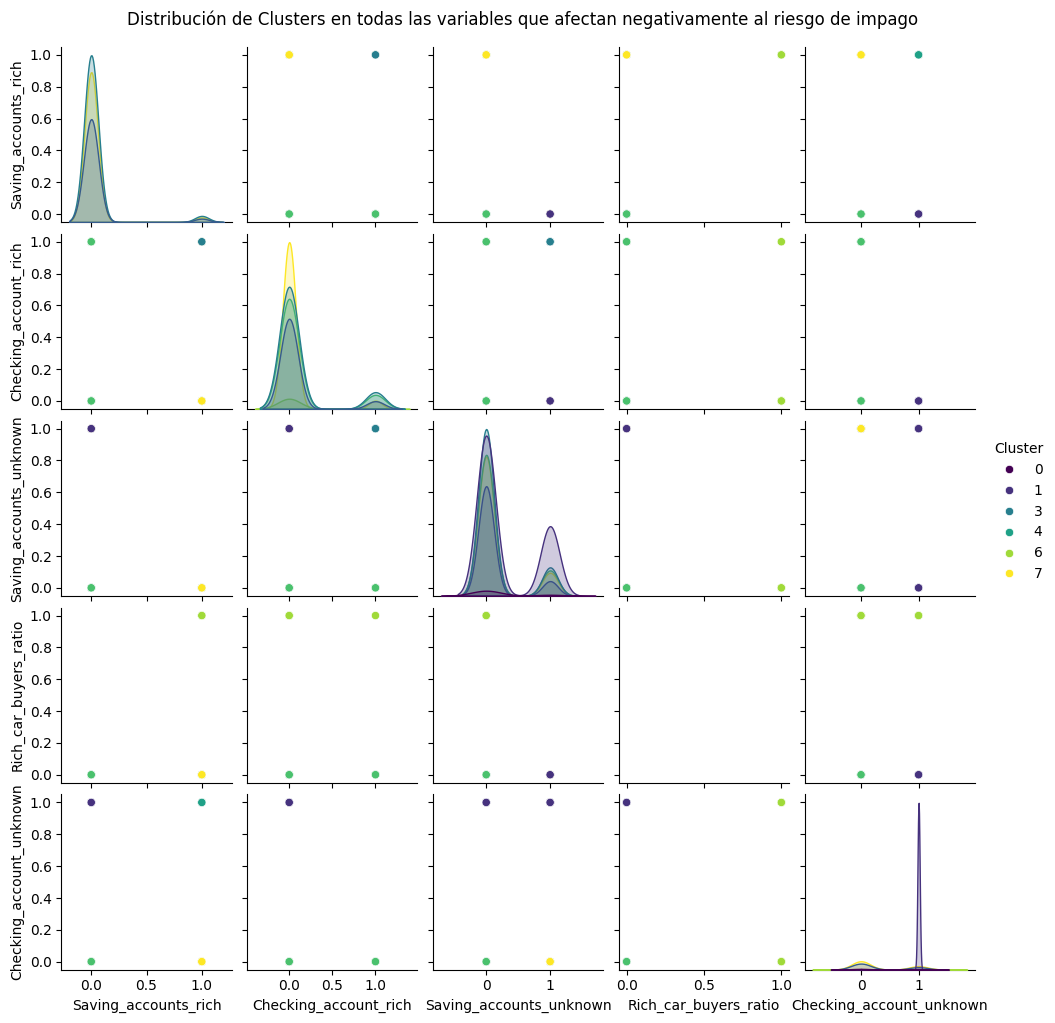

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el parplot con las variables más relevantes
sns.pairplot(
    df,
    vars=significant_features["Variable"].tolist(),  # Convertir a lista para pasarlo a vars
    hue='Cluster',
    palette='viridis',
    diag_kind='kde',
    height=2
)
plt.suptitle('Distribución de Clusters en todas las variables que afectan negativamente al riesgo de impago', y=1.02)
plt.show()


In [ ]:
# Definir nombres de los clusters
cluster_names = {
    0: "Propietarios de Vivienda con Altas Cuentas de Crédito",
    1: "Alta Estabilidad Económica con Bajos Riesgos de Impago",
    2: "Propietarios Moderados con Bajo Nivel de Ahorros",
    3: "Propietarios con Nivel Alto de Créditos para Radio/TV",
    4: "Usuarios con Alto Ahorro sin Cuenta de Cheques",
    5: "Alta Diversidad con Elevada Probabilidad de Impago",
    6: "Arrendatarios con Acceso a Cuentas Elevadas",
    7: "Arrendatarios con Préstamos para Múltiples Propósitos",
}

# Crear una nueva columna en el DataFrame con los nombres de los clusters
df['Cluster_Description'] = df['Cluster'].map(cluster_names)

# Verificar los resultados
print(df[['Cluster', 'Cluster_Description']].drop_duplicates())


    Cluster                                Cluster_Description
0         1  Alta Estabilidad Económica con Bajos Riesgos d...
1         3  Propietarios con Nivel Alto de Créditos para R...
3         2   Propietarios Moderados con Bajo Nivel de Ahorros
4         5  Alta Diversidad con Elevada Probabilidad de Im...
7         7  Arrendatarios con Préstamos para Múltiples Pro...
8         4     Usuarios con Alto Ahorro sin Cuenta de Cheques
67        6        Arrendatarios con Acceso a Cuentas Elevadas
72        0  Propietarios de Vivienda con Altas Cuentas de ...


In [ ]:
# Lista de características seleccionadas
features = significant_features["Variable"].tolist()
# Calcular proporciones promedio por cluster
cluster_proportions = df.groupby('Cluster')[features].mean()

# Ordenar las proporciones para cada característica dentro de cada cluster
cluster_summary = cluster_proportions.sort_values(by=features, ascending=False)

# Mostrar el resumen de proporciones por cluster
print("Proporciones promedio de las características seleccionadas por cluster:")
print(cluster_summary)


Proporciones promedio de las características seleccionadas por cluster:
         Saving_accounts_rich  Checking_account_rich  Saving_accounts_unknown  \
Cluster                                                                         
6                    1.000000               0.055556                 0.000000   
4                    1.000000               0.000000                 0.000000   
3                    0.035176               0.120603                 0.145729   
2                    0.031496               0.078740                 0.118110   
7                    0.029586               0.047337                 0.142012   
5                    0.000000               0.112994                 0.152542   
1                    0.000000               0.000000                 0.302817   
0                    0.000000               0.000000                 0.166667   

         Rich_car_buyers_ratio  Checking_account_unknown  
Cluster                                                   

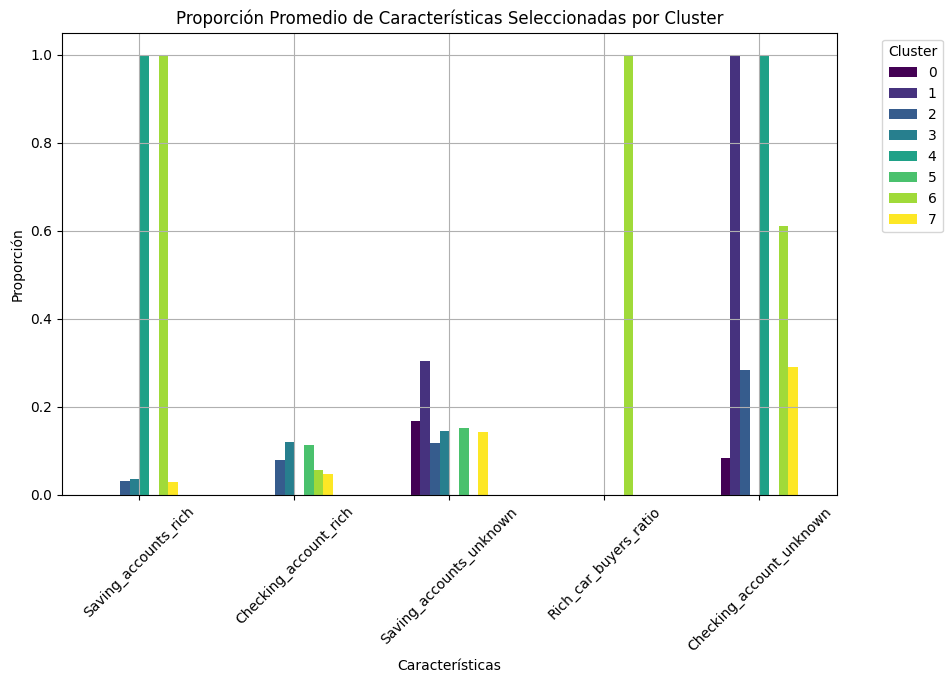

In [ ]:
import matplotlib.pyplot as plt

# Graficar proporciones para cada característica por cluster
cluster_proportions.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Proporción Promedio de Características Seleccionadas por Cluster')
plt.ylabel('Proporción')
plt.xlabel('Características')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [ ]:
cluster_names = {
    0: "Propietarios con créditos altos(Housing_own, Saving accounts moderate, altos créditos mensuales)",
    1: "Propietarios con créditos bajos (Housing_own predominante, Saving accounts low)",
    2: "Propietarios promedio con uso moderado de crédito (Housing_own, Saving accounts_quite rich moderado)",
    3: "Arrendatarios con créditos pequeños (Housing_rent, Saving accounts moderate, riesgo medio)",
    4: "Compradores de autos con ingresos regulares (Rich_car_buyers predominante, Credit_per_month alto)",
    5: "Clientes con alto riesgo y uso excesivo de crédito (No_checking_high_saving, Credit_per_month negativo)",
    6: "Clientes sin cuentas de ahorro, créditos bajos (Saving accounts unknown, Credit_per_month medio)",
    7: "Propietarios jóvenes con créditos regulares (Housing_own, Age joven, Saving accounts desconocidas)"
}

# Renombrar los clusters en el DataFrame
df['Cluster_Description'] = df['Cluster'].map(cluster_names)

# Mostrar los resultados para verificar
df[['Cluster', 'Cluster_Description']].head()


,Cluster,Cluster_Description
0,1,Propietarios con créditos bajos (Housing_own p...
1,3,Arrendatarios con créditos pequeños (Housing_r...
2,1,Propietarios con créditos bajos (Housing_own p...
3,2,Propietarios promedio con uso moderado de créd...
4,5,Clientes con alto riesgo y uso excesivo de cré...


<ipython-input-101-c1d02264215d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Probabilidad_de_Impago', data=df, palette='viridis')


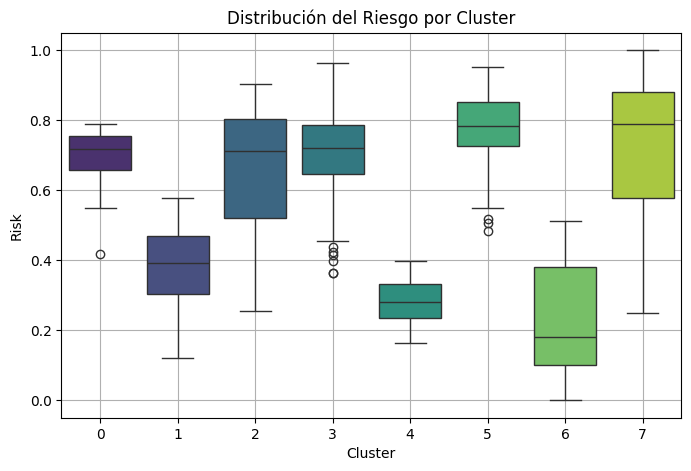

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de Risk por Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Probabilidad_de_Impago', data=df, palette='viridis')
plt.title('Distribución del Riesgo por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Risk')
plt.grid()
plt.show()


In [ ]:
riesgo_promedio_actual = df['Probabilidad_de_Impago'].mean()
riesgo_promedio_actual

0.6122341110341507

# Predicciones con Random forest

punto de corte se define para administrar el riesgo

xgboost - ligth gbm
riesgo_ predice resultado, eror, error sobre error

Bayesian search optimization

Optimizing Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       102
           1       0.99      0.88      0.94       198

    accuracy                           0.92       300
   macro avg       0.90      0.94      0.91       300
weighted avg       0.93      0.92      0.92       300

Optimizing Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Logistic Regression Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       102
           1       0.99      0.88      0.94       198

    accuracy                           0.92       300
   macro avg       0.90      0.94      0.91       300
weighted avg       0.93      0.92      0.92       300

Optimizing Support Vector Machine...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
S

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:02:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       102
           1       0.99      0.88      0.94       198

    accuracy                           0.92       300
   macro avg       0.90      0.94      0.91       300
weighted avg       0.93      0.92      0.92       300

Optimizing Neural Network...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Neural Network Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       102
           1       0.99      0.88      0.94       198

    accuracy                           0.92       300
   macro avg       0.90      0.94      0.91       300
weighted avg       0.93      0.92      0.92       300


Resultados de precisión de todos los modelos:
                    Model  Accuracy
0           Random Forest      0.92
1     Logistic Regression      0.92
2  Support Vector Machine      0.92
3     K-Near

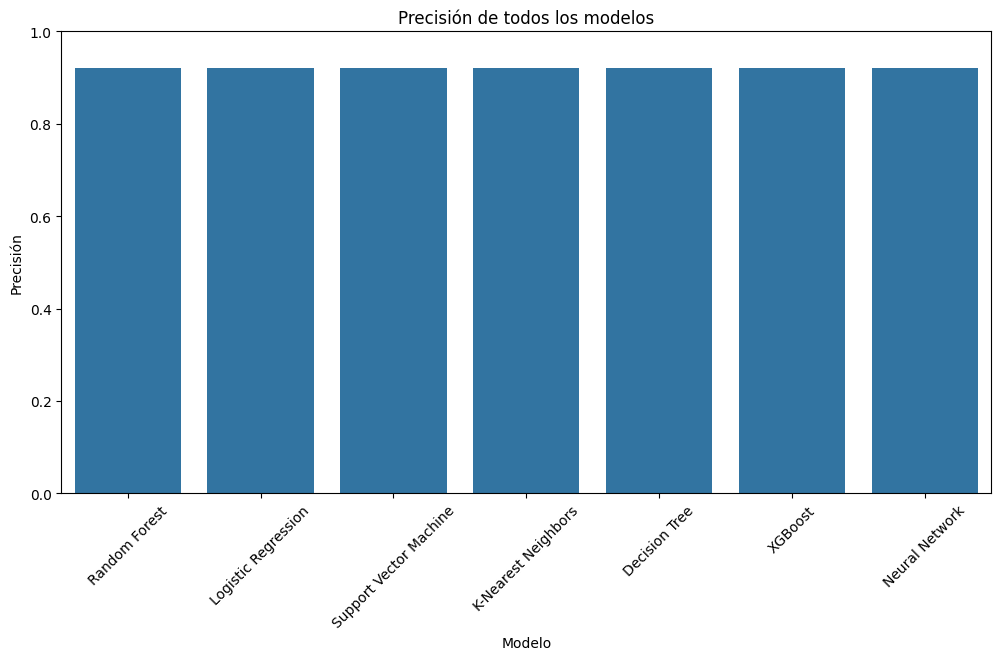

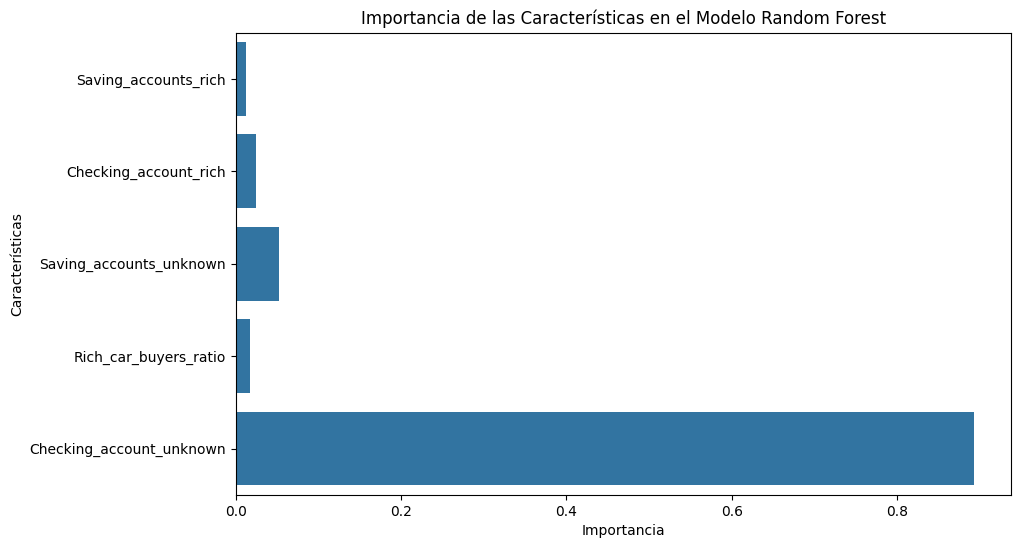

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame
# (Asegúrate de tener el DataFrame `df` con las columnas mencionadas en las imágenes adjuntas)

# Convertir la variable 'Probabilidad_de_Impago' en una variable categórica binaria
df['Riesgo_Categorico'] = df['Probabilidad_de_Impago'].apply(lambda x: 1 if x > 0.5 else 0)

# Separar las variables independientes y la variable dependiente
X = df[['Saving_accounts_rich', 'Checking_account_rich', 'Saving_accounts_unknown', 'Rich_car_buyers_ratio', 'Checking_account_unknown']]
y = df['Riesgo_Categorico']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los modelos a evaluar y sus hiperparámetros para la optimización
models = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }),
    'Support Vector Machine': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 11],
        'weights': ['uniform', 'distance']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'Neural Network': (MLPClassifier(max_iter=1000), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'learning_rate': ['constant', 'adaptive']
    })
}

# Evaluar cada modelo con optimización de hiperparámetros y almacenar los resultados en un DataFrame
evaluation_results = []
for model_name, (model, param_grid) in models.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append({'Model': model_name, 'Accuracy': accuracy})
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(evaluation_results)
print("\nResultados de precisión de todos los modelos:")
print(df_results)

# Visualización de los resultados de precisión
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results)
plt.title('Precisión de todos los modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Visualización de la importancia de características (solo para Random Forest)
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)
best_model.fit(X_train, y_train)
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, orient='h')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Visualización de las predicciones del mejor modelo (Random Forest)
y_pred_best = best_model.predict(X_test)
df_predictions = X_test.copy()
df_predictions['Predicted_Probabilidad_de_Impago'] = y_pred_best




xgboost, no estandarizar ni combinaciones
xgboost asume nans como categoria


In [ ]:
significant_features

,Variable,Beta
9,Saving_accounts_rich,-0.687441
12,Checking_account_rich,-0.823774
10,Saving_accounts_unknown,-0.830385
23,Rich_car_buyers_ratio,-1.187858
13,Checking_account_unknown,-1.768971


# A/B TESTING


- Hipótesis Nula (H₀): No hay diferencia significativa en el riesgo promedio de impago después de implementar una verificacion de saldo en la cuenta de cheques.

- Hipótesis Alternativa (H₁): Existe una diferencia significativa en el riesgo promedio de impago después de implementar una verificacion de saldo en la cuenta de cheques.

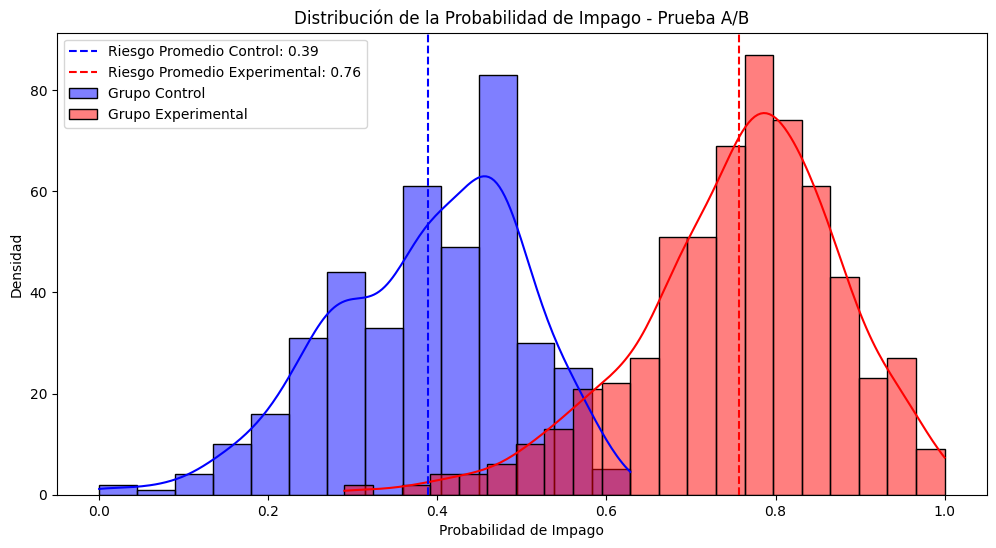

Estadístico de prueba: -48.3202
Valor p: 0.0000
Resultado: Rechazamos la hipótesis nula. Hay evidencia significativa de una reducción en el riesgo.


In [ ]:
# Prueba A/B para reducir el riesgo promedio
# Dividir el conjunto de datos en grupo de control (sin cambios) y grupo experimental (con cambios en las características significativas)
control_group = df[df['Checking_account_unknown'] == 1]
experimental_group = df[df['Checking_account_unknown'] == 0]

# Calcular el riesgo promedio en cada grupo
riesgo_control = control_group['Probabilidad_de_Impago'].mean()
riesgo_experimental = experimental_group['Probabilidad_de_Impago'].mean()

# Realizar la prueba t para comparar los riesgos
stat, p_value = ttest_ind(control_group['Probabilidad_de_Impago'], experimental_group['Probabilidad_de_Impago'])

# Nivel de significancia
alpha = 0.05

# Visualización de la prueba de hipótesis
plt.figure(figsize=(12, 6))
sns.histplot(control_group['Probabilidad_de_Impago'], color='blue', label='Grupo Control', kde=True)
sns.histplot(experimental_group['Probabilidad_de_Impago'], color='red', label='Grupo Experimental', kde=True)
plt.axvline(riesgo_control, color='blue', linestyle='--', label=f'Riesgo Promedio Control: {riesgo_control:.2f}')
plt.axvline(riesgo_experimental, color='red', linestyle='--', label=f'Riesgo Promedio Experimental: {riesgo_experimental:.2f}')
plt.title('Distribución de la Probabilidad de Impago - Prueba A/B')
plt.xlabel('Probabilidad de Impago')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Mostrar resultados de la prueba
print(f'Estadístico de prueba: {stat:.4f}')
print(f'Valor p: {p_value:.4f}')
if p_value < alpha:
    print("Resultado: Rechazamos la hipótesis nula. Hay evidencia significativa de una reducción en el riesgo.")
else:
    print("Resultado: No se puede rechazar la hipótesis nula. No hay evidencia suficiente de una reducción en el riesgo.")


- Hipótesis Nula (H₀): No hay diferencia significativa en el riesgo promedio de impago después de implementar una verificacion de saldo en la cuenta de ahorros.

- Hipótesis Alternativa (H₁): Existe una diferencia significativa en el riesgo promedio de impago después de implementar una verificacion de saldo en la cuenta de ahorros.

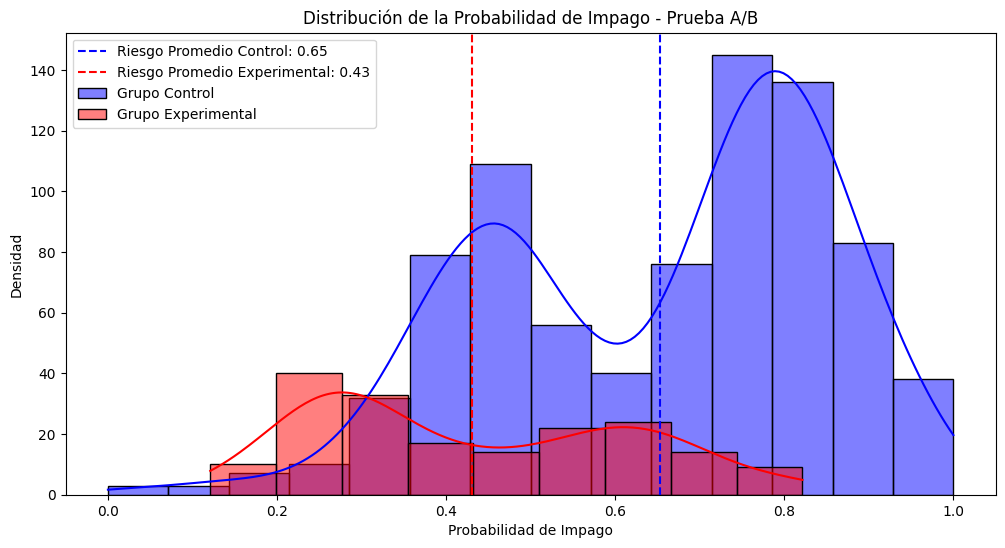

Estadístico de prueba: 13.8585
Valor p: 0.0000
Resultado: Rechazamos la hipótesis nula. Hay evidencia significativa de una reducción en el riesgo.


In [ ]:
# Prueba A/B para reducir el riesgo promedio
# Dividir el conjunto de datos en grupo de control (sin cambios) y grupo experimental (con cambios en las características significativas)
control_group = df[df['Saving_accounts_unknown'] == 0]
experimental_group = df[df['Saving_accounts_unknown'] == 1]

# Calcular el riesgo promedio en cada grupo
riesgo_control = control_group['Probabilidad_de_Impago'].mean()
riesgo_experimental = experimental_group['Probabilidad_de_Impago'].mean()

# Realizar la prueba t para comparar los riesgos
stat, p_value = ttest_ind(control_group['Probabilidad_de_Impago'], experimental_group['Probabilidad_de_Impago'])

# Nivel de significancia
alpha = 0.05

# Visualización de la prueba de hipótesis
plt.figure(figsize=(12, 6))
sns.histplot(control_group['Probabilidad_de_Impago'], color='blue', label='Grupo Control', kde=True)
sns.histplot(experimental_group['Probabilidad_de_Impago'], color='red', label='Grupo Experimental', kde=True)
plt.axvline(riesgo_control, color='blue', linestyle='--', label=f'Riesgo Promedio Control: {riesgo_control:.2f}')
plt.axvline(riesgo_experimental, color='red', linestyle='--', label=f'Riesgo Promedio Experimental: {riesgo_experimental:.2f}')
plt.title('Distribución de la Probabilidad de Impago - Prueba A/B')
plt.xlabel('Probabilidad de Impago')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Mostrar resultados de la prueba
print(f'Estadístico de prueba: {stat:.4f}')
print(f'Valor p: {p_value:.4f}')
if p_value < alpha:
    print("Resultado: Rechazamos la hipótesis nula. Hay evidencia significativa de una reducción en el riesgo.")
else:
    print("Resultado: No se puede rechazar la hipótesis nula. No hay evidencia suficiente de una reducción en el riesgo.")


# Optimizacion:
## Analizaremos con respecto a las betas de las variables con respecto a probabilidad de impago una funcion objetivo a minimizar en un 10% para saber que recomendaciones hacer para cumplir nuestro kpi

Champion challenger

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Job                          1000 non-null   float64
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Risk                         1000 non-null   int64  
 5   Sex_male                     1000 non-null   bool   
 6   Housing_own                  1000 non-null   bool   
 7   Housing_rent                 1000 non-null   bool   
 8   Saving_accounts_moderate     1000 non-null   bool   
 9   Saving_accounts_quite_rich   1000 non-null   bool   
 10  Saving_accounts_rich         1000 non-null   bool   
 11  Saving_accounts_unknown      1000 non-null   bool   
 12  Checking_account_moderate    1000 non-null   bool   
 13  Checking_account_ri

In [ ]:
# Separar las variables independientes y dependiente
X = df.drop(columns=['Probabilidad_de_Impago', 'Risk', 'Cluster', 'Cluster_Description', 'Riesgo_Categorico'])
y = (df['Probabilidad_de_Impago'] > 0.5).astype(int)  # Convertir a variable binaria

# Ajustar un modelo de regresión logística
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

# Obtener los coeficientes (betas)
betas = pd.DataFrame({
    'Variable': X.columns,
    'Beta': logreg.coef_[0]
}).sort_values(by='Beta', ascending=False)

print(betas)


                       Variable      Beta
11    Checking_account_moderate  0.908383
16            Purpose_education  0.317171
3                      Duration  0.188811
20      Purpose_vacation_others  0.069345
2                 Credit amount  0.058113
15  Purpose_domestic appliances  0.056080
1                           Job  0.025861
21      Credit_per_month_amount -0.004990
17  Purpose_furniture_equipment -0.016352
22         Age_per_credit_ratio -0.021553
6                  Housing_rent -0.045996
19              Purpose_repairs -0.096569
14                  Purpose_car -0.108914
7      Saving_accounts_moderate -0.262079
24      No_checking_high_saving -0.441108
0                           Age -0.603418
12        Checking_account_rich -0.716642
8    Saving_accounts_quite_rich -1.239509
5                   Housing_own -1.449044
18             Purpose_radio_TV -1.864525
9          Saving_accounts_rich -2.214997
4                      Sex_male -2.473382
23        Rich_car_buyers_ratio -2

Pesos óptimos para reducir el riesgo en un 10%:
Checking_account_moderate: 0.6308
Purpose_education: 0.1525
Duration: 0.0486
Purpose_vacation_others: 0.0076
Credit_amount: 0.0076
Purpose_domestic_appliances: 0.0076
Job: 0.0076
Credit_per_month_amount: 0.0076
Purpose_furniture_equipment: 0.0076
Age_per_credit_ratio: 0.0076
Housing_rent: 0.0076
Purpose_repairs: 0.0076
Purpose_car: 0.0076
Saving_accounts_moderate: 0.0076
No_checking_high_saving: 0.0076
Age: 0.0076
Checking_account_rich: 0.0076
Saving_accounts_quite_rich: 0.0076
Housing_own: 0.0076
Purpose_radio_TV: 0.0076
Saving_accounts_rich: 0.0076
Sex_male: 0.0076
Rich_car_buyers_ratio: 0.0076
Saving_accounts_unknown: 0.0076
Checking_account_unknown: 0.0076
Riesgo alcanzado: 0.4500


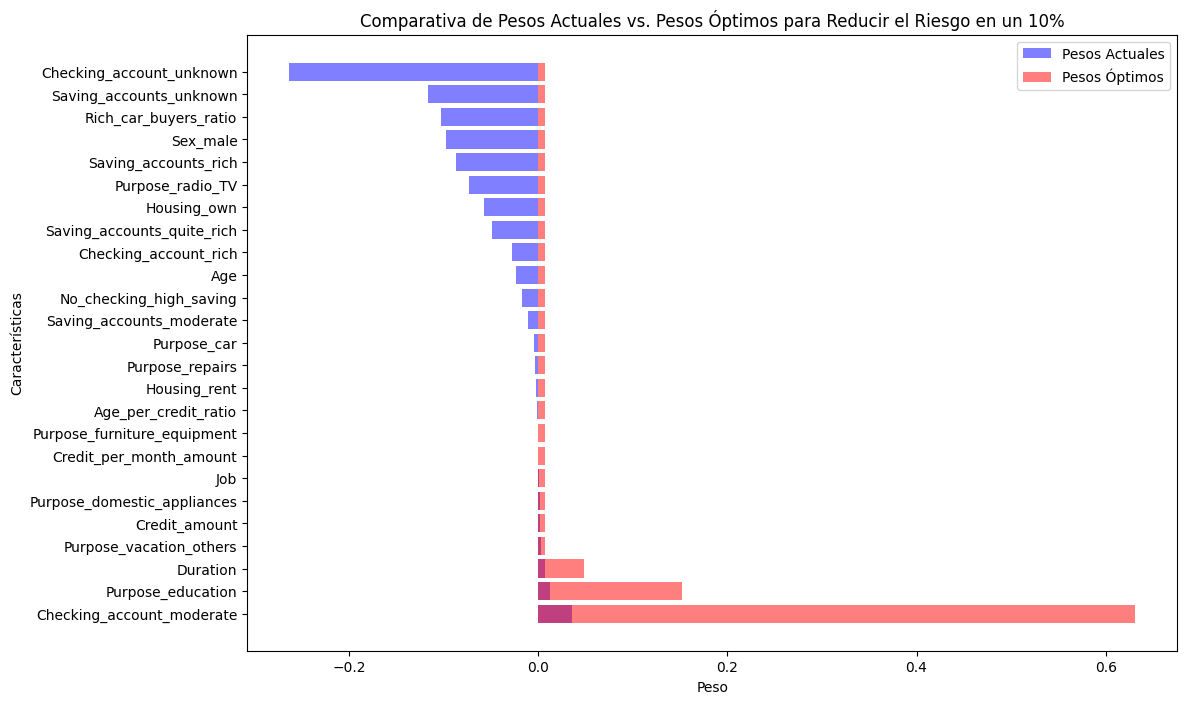

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos de betas extraídos de la imagen
betas = {
    "Checking_account_moderate": 0.908383,
    "Purpose_education": 0.317171,
    "Duration": 0.188811,
    "Purpose_vacation_others": 0.069345,
    "Credit_amount": 0.058113,
    "Purpose_domestic_appliances": 0.056080,
    "Job": 0.025861,
    "Credit_per_month_amount": -0.004990,
    "Purpose_furniture_equipment": -0.016352,
    "Age_per_credit_ratio": -0.021553,
    "Housing_rent": -0.045966,
    "Purpose_repairs": -0.096569,
    "Purpose_car": -0.108914,
    "Saving_accounts_moderate": -0.260279,
    "No_checking_high_saving": -0.441108,
    "Age": -0.603418,
    "Checking_account_rich": -0.716642,
    "Saving_accounts_quite_rich": -1.239509,
    "Housing_own": -1.449044,
    "Purpose_radio_TV": -1.864525,
    "Saving_accounts_rich": -2.214997,
    "Sex_male": -2.473382,
    "Rich_car_buyers_ratio": -2.627005,
    "Saving_accounts_unknown": -2.959699,
    "Checking_account_unknown": -6.694529,
}

# Definir la función objetivo para minimizar (reducción del 10% del riesgo promedio actual)
riesgo_promedio_actual = 0.6  # Este valor es un placeholder, actualízalo con el promedio real si lo tienes
meta_riesgo = riesgo_promedio_actual * 0.9

# Convertir betas a numpy array para los cálculos
def objective_function(weights):
    betas_array = np.array(list(betas.values()), dtype=float)
    weights_array = np.array(weights, dtype=float)
    risk = np.sum(weights_array * betas_array)
    return abs(risk - meta_riesgo)

# Restricción: la suma de los pesos debe ser 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Los pesos deben estar entre 0 y 1
bounds = [(0, 1) for _ in range(len(betas))]

# Inicialización de los pesos
initial_weights = [1 / len(betas)] * len(betas)

# Minimización del riesgo
result = minimize(objective_function, initial_weights, bounds=bounds, constraints=constraints)

# Resultados
print("Pesos óptimos para reducir el riesgo en un 10%:")
for i, (feature, _) in enumerate(betas.items()):
    print(f"{feature}: {result.x[i]:.4f}")

print(f"Riesgo alcanzado: {meta_riesgo:.4f}")

# Visualización de los pesos óptimos vs. los pesos actuales
pesos_actuales = np.array(list(betas.values()), dtype=float) / np.sum(np.abs(list(betas.values())))

plt.figure(figsize=(12, 8))
plt.barh(list(betas.keys()), pesos_actuales, alpha=0.5, label='Pesos Actuales', color='b')
plt.barh(list(betas.keys()), result.x, alpha=0.5, label='Pesos Óptimos', color='r')
plt.xlabel('Peso')
plt.ylabel('Características')
plt.title('Comparativa de Pesos Actuales vs. Pesos Óptimos para Reducir el Riesgo en un 10%')
plt.legend()
plt.show()


# Estrategias para Reducir el Riesgo de Crédito

## 1. Mejora del Proceso de Análisis de Crédito
Implementar modelos de evaluación más sofisticados que incluyan análisis de comportamiento de pago y scoring crediticio avanzado utilizando datos históricos y Machine Learning. Esto permitirá identificar de manera más precisa a los solicitantes con riesgo elevado de impago.

## 2. Establecimiento de Límites de Exposición por Cliente
Fijar un límite de crédito específico para cada cliente basado en su capacidad de pago, estableciendo un ratio de **relación deuda-ingreso** (DTI) máximo. Esto ayudará a garantizar que los clientes no se sobreendeuden, minimizando el riesgo de incumplimiento.

## 3. Ofrecer Productos Crediticios con Garantías
Incentivar el uso de créditos garantizados (por ejemplo, hipotecas con bienes inmuebles como garantía o créditos prendarios con vehículos). Esto proporciona a la institución una forma de recuperar parte del crédito en caso de incumplimiento, reduciendo la pérdida esperada.

## 4. Monitoreo Continuo de los Prestatarios
Implementar sistemas de monitoreo continuo para clientes con crédito vigente, analizando cambios en su comportamiento financiero, como un incremento en el uso del crédito o la acumulación de deudas. El monitoreo temprano permitirá a la institución anticipar problemas y tomar medidas proactivas, como restructuración de deudas o apoyo financiero temporal.

## 5. Segmentación y Diversificación de la Cartera Crediticia
Diversificar la cartera crediticia evitando una concentración excesiva en un solo sector o segmento de clientes. La diversificación ayudará a reducir la exposición a riesgos sistémicos o específicos de un sector, asegurando que el impacto de un posible impago sea menor para la institución en su conjunto.

## 6. Revisar y Ajustar la Política de Verificación de Cuentas Bancarias
Reducir el impacto negativo de características como "Checking_account_unknown" y "Saving_accounts_unknown" enfocándose en obtener más información bancaria de los solicitantes. Esto ayudará a reducir la incertidumbre respecto a la disponibilidad de cuentas y a mejorar la evaluación del perfil de riesgo.

## 7. Enfocarse en Características de Duración del Crédito
La característica "Duration" tiene un peso óptimo positivo considerable. Considerar extender el plazo del crédito bajo ciertas condiciones controladas podría ayudar a reducir el riesgo, siempre y cuando la capacidad de pago esté respaldada por ingresos estables.

## 8. Modificar la Política de Créditos Moderados
Otorgar más créditos a clientes con ahorros o cuentas de chequeo moderados podría reducir el riesgo, ya que características como "Checking_account_moderate" y "Saving_accounts_moderate" tienen un peso positivo significativo. Fomentar estos créditos y asegurar la estabilidad de los ahorros o activos es recomendable.

## 9. Optimizar los Productos Financieros Ofrecidos Según su Propósito
Propósitos como "Purpose_education", "Purpose_domestic_appliances" y "Purpose_vacation_others" muestran pesos positivos en los valores óptimos. Promover productos de crédito destinados a fines específicos que contribuyen al desarrollo personal y familiar puede ser menos riesgoso.

## 10. Mejorar la Evaluación del Historial Crediticio y la Relación Edad-Crédito
Optimizar el análisis de la relación entre la edad del solicitante y el crédito otorgado, ajustando el perfil crediticio según la etapa de vida del cliente, puede reducir el riesgo significativamente. Establecer criterios claros que evalúen la adecuación entre la edad del solicitante y el tipo de crédito solicitado ayudará a lograr un balance óptimo.
